<a href="https://colab.research.google.com/github/vbrail/Dress_Design_Pattern/blob/master/dress_design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import os
import requests
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import math
from tqdm import tqdm
import datetime as dt

In [0]:
PROJ_PATH='drive/My Drive/Colab Notebooks/Project'
# set the path where you want to perform this project

In [0]:
temp_path = os.path.join(PROJ_PATH,'Project')
if not os.path.isdir(temp_path):
  os.mkdir(temp_path)
  PROJ_PATH = temp_path
# copy th csv file here in project folder

In [0]:
csv = pd.read_csv( os.path.join(PROJ_PATH,'dress_patterns.csv'))

In [0]:
temp_path = os.path.join(PROJ_PATH,'image_data')
if not os.path.isdir(temp_path):
  os.mkdir(temp_path)

In [0]:
csv.columns

Index(['_unit_id', 'category', 'category:confidence', 'image_url'], dtype='object')

In [0]:
for  col in csv.columns:
  print(csv[col].isnull().value_counts())

False    15702
Name: _unit_id, dtype: int64
False    15702
Name: category, dtype: int64
False    15702
Name: category:confidence, dtype: int64
False    15702
Name: image_url, dtype: int64


> No missing Values good


In [0]:
temp_path = os.join(PROJ_PATH,'image_data')
no_of_data = len(csv)
invalid_urls=[]
for i in range(no_of_data):
  url_name = csv.iloc[i]['image_url']
  name= csv.iloc[i]['_unit_id']
  if request.status_code == 200:
    imdata = requests.get(url_name).content
    with open(os.path.join(temp_path,str(name)+'.png', 'wb') as fout:
      fout.write(imdata)
  else:
    invalid_urls.append(name)

if len(invalid_urls) != 0:
  print(invalid_urls)
else:
  print('Sucessfully downloaded all the images')

Sucessfully downloaded all the images


In [0]:
file_list = os.listdir(temp_path)

In [0]:
len(file_list)

15703

In [0]:
try:
  file_list.remove('.ipynb_checkpoints')
except ValueError:
  pass

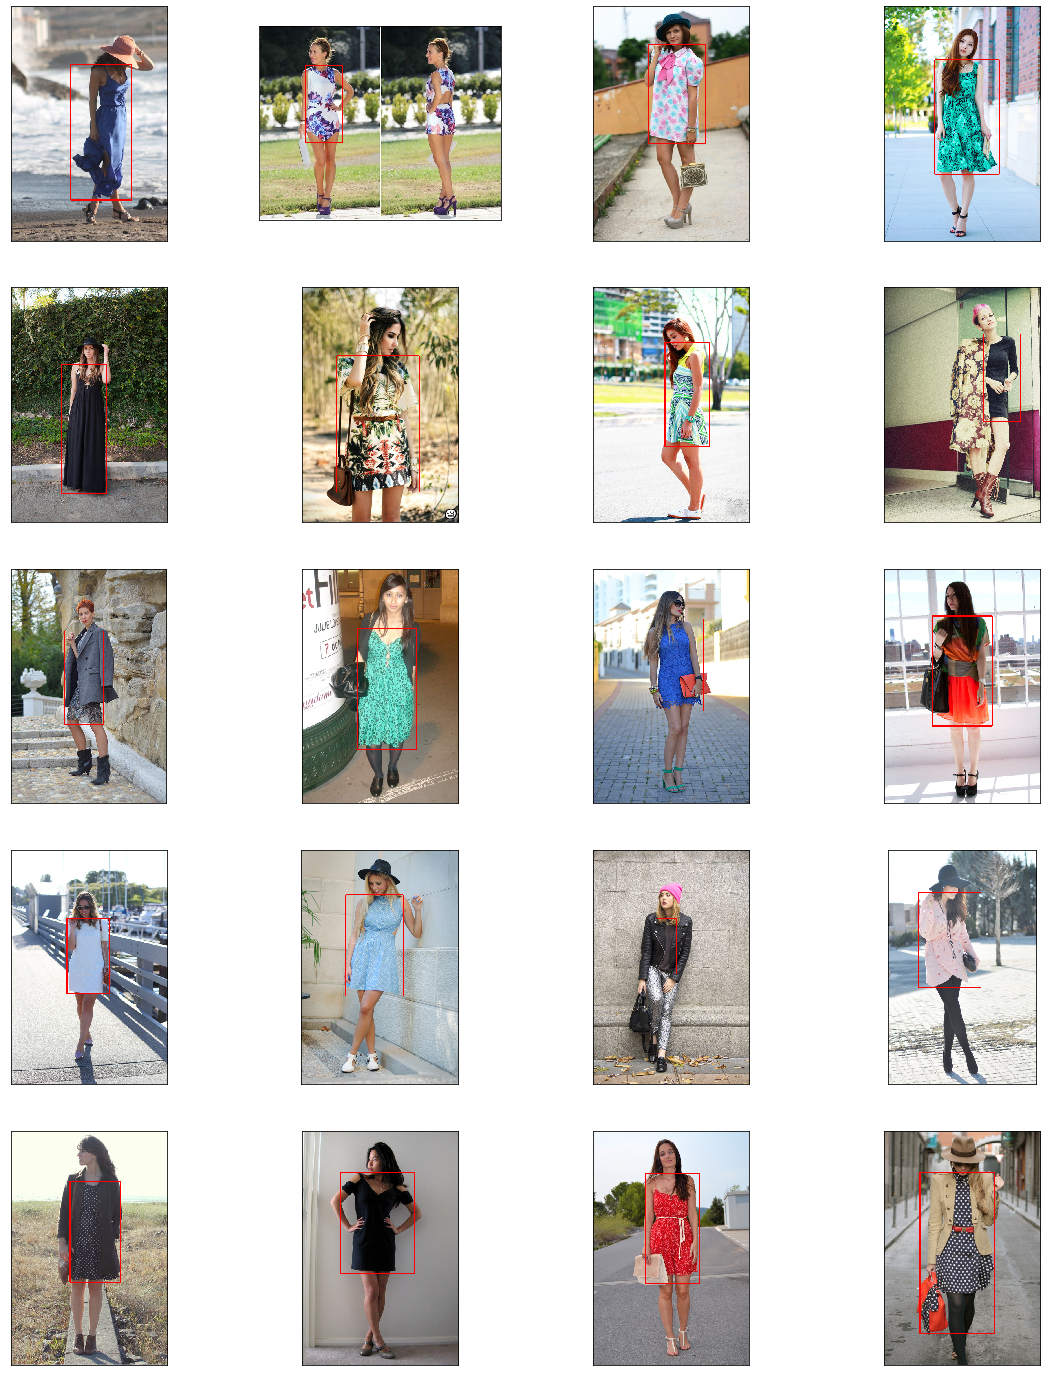

In [0]:
# Plotting few random images
plt.figure(figsize=(20,25))
for i in range(20):
  plt.subplot(5,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(plt.imread(os.path.join(temp_path,file_list[np.random.randint(0,15700)])))
  

In [0]:
dest_path = os.path.join(PROJ_PATH,'ROI_OF_IMAGES')
if not os.path.isdir(dest_path):
  os.mkdir(dest_path)

In [0]:
# extraction roi from images
error_images = []
for imgFile in tqdm(file_list):
  try:
    img = cv2.imread(os.path.join(temp_path,imgFile))
    b,g,r = cv2.split(img)
    ret, mask = cv2.threshold(g, 0, 255, cv2.THRESH_BINARY)
    mask2 = np.invert(mask)
    contours, hierarchy = cv2.findContours(mask2,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
    max_ind = np.argmax([cv2.contourArea(i) for i in contours])
    x, y, width, height = cv2.boundingRect(contours[max_ind])
    if not (width < b.shape[1] ):
      ret, mask2 = cv2.threshold(r, 254, 255, cv2.THRESH_BINARY)
      contours, hierarchy = cv2.findContours(mask2,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
      max_ind= np.argmax([cv2.contourArea(i) for i in contours])
      x, y, width, height = cv2.boundingRect(contours[max_ind])
    roi = img[y:y+height, x:x+width]
    cv2.imwrite(os.path.join(dest_path,"roi_"+imgFile), roi)
  except ValueError as err:
    error_images.append(imgFile)  
    print(err)  

if len(error_images)==0:
  print('Cropped all images sucessfully')
else:
  print(error_images)
  

100%|██████████| 15702/15702 [1:52:50<00:00,  2.45it/s]

Cropped all images sucessfully


In [0]:
crp_file_list =os.listdir(dest_path)


In [0]:
try:
  crp_file_list.remove('.ipynb_checkpoints')
except:
  pass

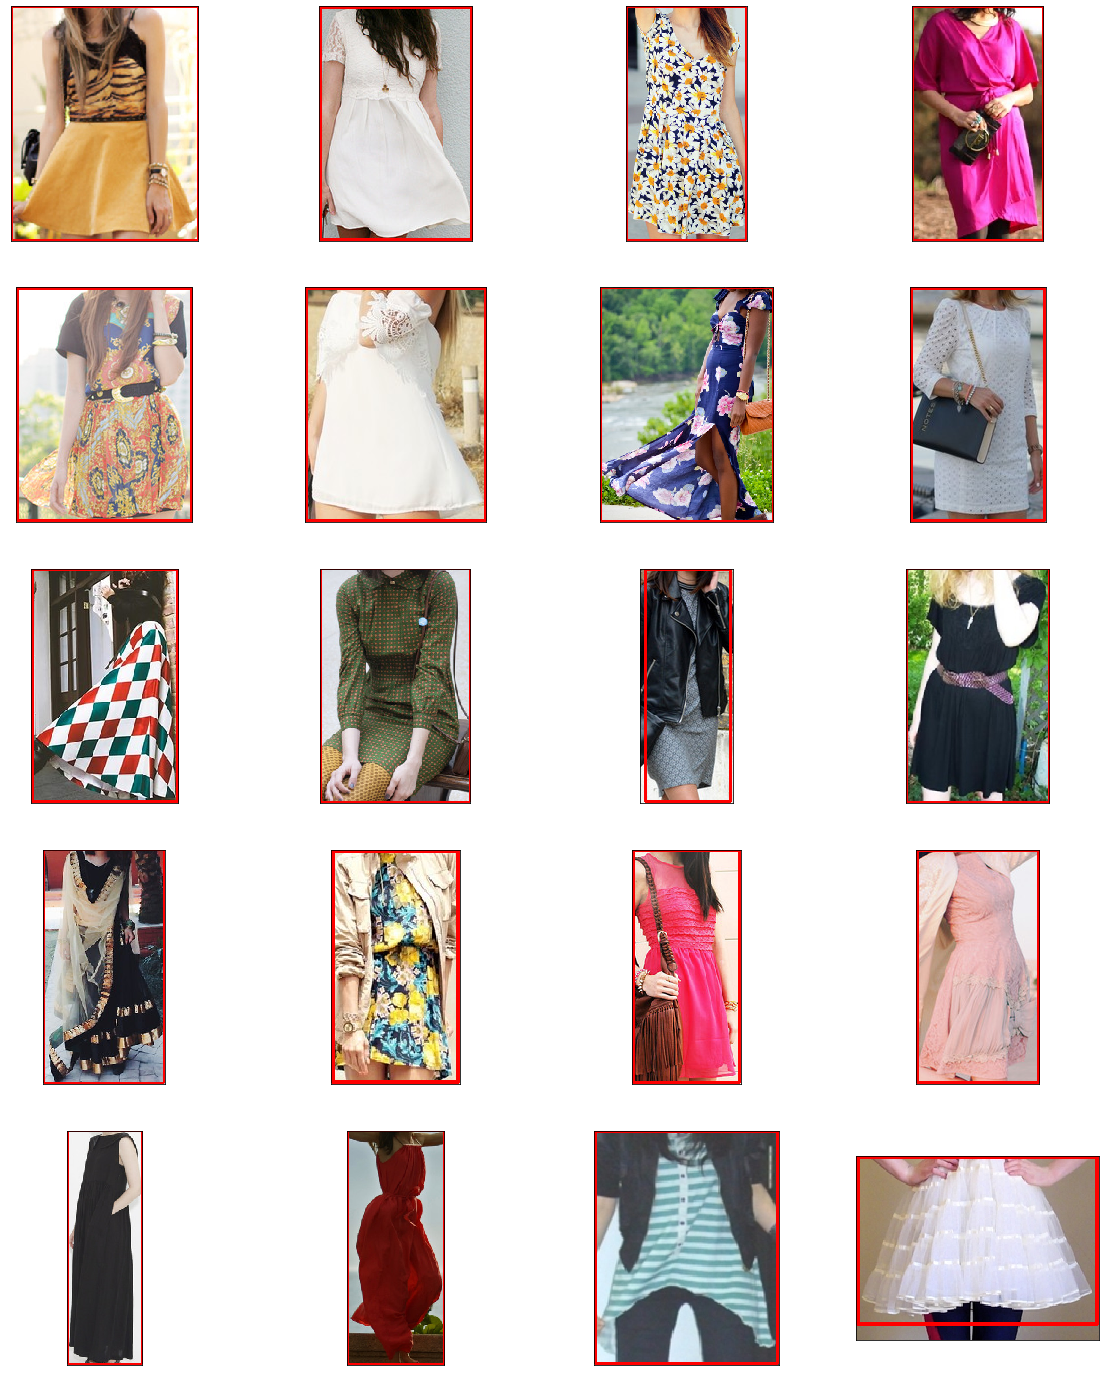

In [0]:
# Plotting few random cropped images
plt.figure(figsize=(20,25))
for i in range(20):
  plt.subplot(5,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(plt.imread(os.path.join(dest_path,crp_file_list[np.random.randint(0,15600)])))
  

In [0]:
categories = list(csv['category'].unique())

In [0]:
temp_path = os.path.join(PROJ_PATH,'Dataset')
if not os.path.isdir(temp_path):
  os.mkdir(temp_path)
temp_path2 = os.path.join(temp_path,'train')
if not os.path.isdir(temp_path2):
  os.mkdir(temp_path2)
temp_path2 = os.path.join(temp_path,'validation')
if not os.path.isdir(temp_path2):
  os.mkdir(temp_path2)
temp_path2 = os.path.join(temp_path,'test')
if not os.path.isdir(temp_path2):
  os.mkdir(temp_path2)

In [0]:
for j in ['train','validation','test']:
  for i in categories :
      temp_path2 = os.path.join(os.path.join(temp_path,j),i)
      if not os.path.isdir(temp_path2):
        os.mkdir(temp_path2)

In [0]:
from sklearn.model_selection import train_test_split
import shutil


In [0]:
x_tr,x_te,y_tr,y_te = train_test_split(csv['_unit_id'],csv['category'],test_size=.2,stratify = csv['category'],random_state=21 )
# X_tr,x_val,Y_tr,y_val = train_test_split(x_tr,y_tr,test_size=.2,stratify =y_tr )


In [0]:
temp_path = os.path.join(PROJ_PATH,'ROI_OF_IMAGES')
dest_path = os.path.join(os.path.join(PROJ_PATH,'Dataset'),'train')
for i in tqdm(range(len(x_tr))):
  try:
    src = os.path.join(temp_path,'roi_'+str(x_tr.iloc[i])+'.png')
    dest= os.path.join(dest_path,y_tr.iloc[0])
    shutil.copy(src,dest)
  except FileNotFoundError:
    print('file roi_'+str(x_tr.iloc[i])+'.png not found')


100%|██████████| 12561/12561 [2:19:40<00:00,  1.02it/s]


In [0]:
temp_path = os.path.join(PROJ_PATH,'ROI_OF_IMAGES')
dest_path = os.path.join(os.path.join(PROJ_PATH,'Dataset'),'test')
for i in tqdm(range(len(x_te))):
  try:
    src = os.path.join(temp_path,'roi_'+str(x_te.iloc[i])+'.png')
    dest= os.path.join(dest_path,y_te.iloc[0])
    shutil.copy(src,dest)
  except FileNotFoundError:
    print('file roi_'+str(x_te.iloc[i])+'.png not found')


100%|██████████| 3141/3141 [22:53<00:00,  1.20it/s]


ModelINg

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,Model,optimizers,metrics
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_dir = os.path.join(os.path.join(PROJ_PATH,'Dataset'),'train')
test_dir = os.path.join(os.path.join(PROJ_PATH,'Dataset'),'test')

In [0]:
params = dict(validation_split=.20)

In [0]:
INPUT_SHAPE = (300,300)
batch_size  = 32
validation_generator = ImageDataGenerator(**params).flow_from_directory(train_dir,subset="validation",shuffle=True,
                                                                        batch_size=batch_size,target_size=INPUT_SHAPE)
train_generator      = ImageDataGenerator(**params).flow_from_directory(train_dir,subset="training",shuffle=True,
                                                                        batch_size=batch_size,target_size=INPUT_SHAPE)
test_generator       = ImageDataGenerator().flow_from_directory(test_dir,shuffle=False,
                                                                batch_size=batch_size,target_size=INPUT_SHAPE)


Found 2512 images belonging to 17 classes.
Found 10049 images belonging to 17 classes.
Found 3141 images belonging to 17 classes.


In [0]:
os.environ['PYTHONHASHSEED'] = '0'
tf.keras.backend.clear_session()
np.random.seed(0)

Input_layer = Input(shape=(300,300,3),name='Input_Layer')
layer1      = Conv2D(filters=96,kernel_size=(11,11),strides=4,padding='valid',data_format='channels_last',
                     activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0))(Input_layer)
pool1       =  MaxPool2D(pool_size=(3,3), strides=2,padding='valid',data_format='channels_last')(layer1)

layer2      = Conv2D(filters=256,kernel_size=(5,5),strides=1,padding='valid',data_format='channels_last',
                     activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0))(pool1)
pool2       =  MaxPool2D(pool_size=(3,3), strides=2,padding='valid',data_format='channels_last')(layer2)

layer3      = Conv2D(filters=384,kernel_size=(3,3),strides=1,padding='valid',data_format='channels_last',
                     activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0))(pool2)

layer4      = Conv2D(filters=384,kernel_size=(3,3),strides=1,padding='valid',data_format='channels_last',
                     activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0))(layer3)

layer5      = Conv2D(filters=256,kernel_size=(3,3),strides=1,padding='valid',data_format='channels_last',
                     activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=0))(layer4)
pool3       =  MaxPool2D(pool_size=(3,3), strides=2,padding='valid',data_format='channels_last')(layer5)

drop1       =  Dropout(0.5)(pool3)

flat        =  Flatten()(drop1)
fc1         =  Dense(units=4096,activation='relu',
                      kernel_initializer=tf.keras.initializers.glorot_normal(seed=32))(flat)

drop2       =  Dropout(0.5)(fc1)
fc2         =  Dense(units=4096,activation='relu',
                      kernel_initializer=tf.keras.initializers.glorot_normal(seed=32))(drop2)

drop3       =  Dropout(0.5)(fc2)
fc3         =  Dense(units=4096,activation='relu',
                      kernel_initializer=tf.keras.initializers.glorot_normal(seed=32))(drop3)

drop4       =  Dropout(0.5)(fc3)
fc4         =  Dense(units=4096,activation='relu',
                      kernel_initializer=tf.keras.initializers.glorot_normal(seed=32))(drop4)

drop5       =  Dropout(0.5)(fc4)
Output_layer= Dense(units=17,activation='softmax',
                    kernel_initializer=tf.keras.initializers.glorot_normal(seed=3))(drop5)

model = Model(Input_layer,Output_layer)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 73, 73, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 384)       132748

In [0]:
model.compile(optimizer=optimizers.Adam(),loss='categorical_crossentropy',metrics=[metrics.CategoricalAccuracy()])


In [0]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(validation_generator.samples/validation_generator.batch_size)

In [0]:
history = model.fit(train_generator,epochs=3,verbose=1,steps_per_epoch=steps_per_epoch,
                 validation_data=validation_generator,validation_steps=val_steps_per_epoch).history

Epoch 1/3
315/315 [==============================] - 5240s 17s/step - loss: 4.4363 - categorical_accuracy: 0.9968 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 2/3
315/315 [==============================] - 65s 207ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 3/3
315/315 [==============================] - 65s 205ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000


In [0]:
history

{'categorical_accuracy': [0.9968156, 1.0, 1.0],
 'loss': [4.449942935864265, 0.0, 0.0],
 'val_categorical_accuracy': [1.0, 1.0, 1.0],
 'val_loss': [0.0, 0.0, 0.0]}

In [0]:
dest_path = os.path.join(PROJ_PATH,'model')
if not os.path.isdir(dest_path):
  os.mkdir(dest_path)
tf.keras.models.save_model(model, dest_path,save_format='tf')

INFO:tensorflow:Assets written to: drive/My Drive/Colab Notebooks/Project/model/assets


In [0]:
from skimage import transform

In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
def get_design(img):
  img = np.array(img).astype('float32')
  cv2_imshow(img)
  img = transform.resize(img, (300, 300, 3))
  img=np.array(img).reshape(1,300,300,3)
  pat_name = labels[np.argmax(model.predict(img))] 
  print('\n\n Design :',pat_name)
  print('\n\n\n SIMILAR IMAGES\n______________________________________________________________\n\n')
  temp_path = os.path.join(os.path.join(os.path.join(PROJ_PATH,'Dataset'),'train'),pat_name)
  temp_list = os.listdir(temp_path)
  plt.figure(figsize=(10,10))
  for i in range(6):
    plt.subplot(2,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(plt.imread(os.path.join(temp_path,temp_list[np.random.randint(0,len(temp_list)-1)])))


In [0]:
fl = os.listdir(PROJ_PATH+'/ROI_OF_IMAGES')

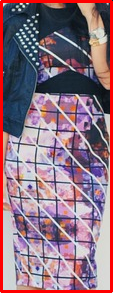



 Design : geometry



 SIMILAR IMAGES
______________________________________________________________




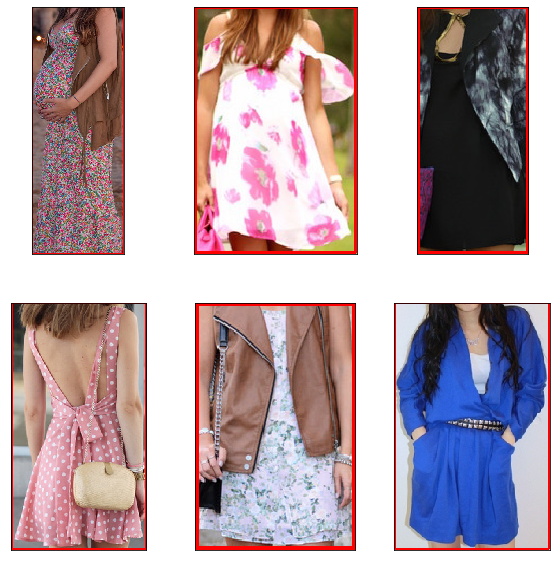

In [202]:
i = np.random.randint(0,15701)
img = cv2.imread(PROJ_PATH+'/ROI_OF_IMAGES/'+fl[i])
get_design(img)

In [0]:
#///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////